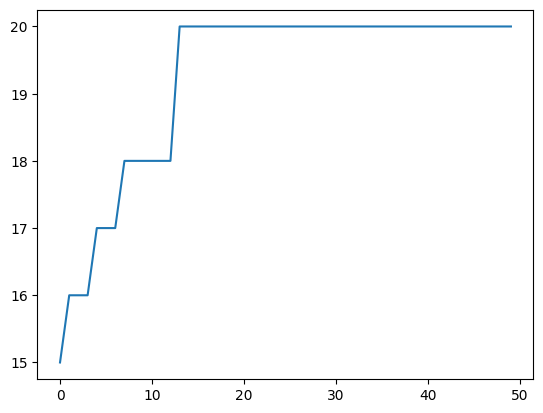

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt


def generate_value():
    return random.randint(0, 1)


def generate_vector(n):
    vector = [generate_value() for i in range(n)]
    return vector


def generate_population(n, m):
    population = []
    for i in range(m):
        population.append(generate_vector(n))
    return population


def fitness_function(vector):
    return sum(vector)


def selection(sorted_population):
    index1 = random.randint(0, len(sorted_population) - 1)
    while True:
        index2 = random.randint(0, len(sorted_population) - 1)
        if index1 != index2:
            break
    return sorted_population[index2] if index2 > index1 else sorted_population[index1]


def crossover(chromosome1, chromosome2, crossover_rate=0.9):
    new_chromosome1 = chromosome1.copy()
    new_chromosome2 = chromosome2.copy()

    for i in range(len(chromosome1)):
        if random.random() < crossover_rate:
            new_chromosome1[i] = chromosome2[i]
            new_chromosome2[i] = chromosome1[i]
    return new_chromosome1, new_chromosome2


def mutation(chromosome, mutation_rate=0.05):
    new_chromosome = chromosome.copy()
    for i in range(len(chromosome)):
        if random.random() < mutation_rate:
            new_chromosome[i] = generate_value()
    return new_chromosome


if __name__ == "__main__":

    # generate population with 20 chromosomes
    population = generate_population(20, 20)
    fitnesses = []
    for i in range(50):
        sorted_population = sorted(population, key=fitness_function)
        fitnesses.append(fitness_function(sorted_population[-1]))
        # take two best chromosome of old population
        # elitism
        the_best_two = sorted_population[-2:]

        new_population = []
        for chromosome in the_best_two:
            new_population.append(chromosome)
        while len(new_population) < 18:
            # selection
            chromosome1 = selection(sorted_population)
            chromosome2 = selection(sorted_population)

            # crossover
            chromosome1, chromosome2 = crossover(chromosome1, chromosome2)

            # mutation
            chromosome1 = mutation(chromosome1)
            chromosome2 = mutation(chromosome2)

            new_population.append(chromosome1)
            new_population.append(chromosome2)
        population = new_population

    x = np.arange(50)
    plt.plot(x, fitnesses)
    plt.show()
